In [11]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import warnings

import torch
import torchvision.transforms as transforms

from torchvision.datasets import CIFAR10
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset

warnings.filterwarnings("ignore")

### Note

All Datasets will be of the format (N, C, H, W) with values between 0 and 1, unless stated otherwise.

This format is easier to deal with in PyTorch.

In [2]:
srmodel = torch.load('model/model_srresnet.pth')["model"]
srmodel = srmodel.cuda()

In [3]:
batch_size = 512

trainset = CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

testset = CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [19]:
def generate_sr_dataset(dataloader, model):
    sr_images, sr_targets = [], []
    for (inputs, targets) in tqdm(dataloader):
        with torch.no_grad():
            inputs = inputs.cuda()
            inputs = Variable(inputs).float()
            sr_inputs = model(inputs)
            sr_images.append(sr_inputs.cpu().numpy().astype(np.float32))
            sr_targets.append(targets.numpy().astype(np.int64))
    sr_images = np.concatenate(sr_images, axis=0).clip(0, 1)
    sr_targets = np.concatenate(sr_targets, axis=0)

    sr_images = torch.from_numpy(sr_images)
    sr_targets = torch.from_numpy(sr_targets)
    sr_dataset = TensorDataset(sr_images, sr_targets)
    return sr_dataset

In [20]:
sr_dataset = generate_sr_dataset(trainloader, srmodel)
sr_dataloader = DataLoader(sr_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

100%|██████████| 98/98 [01:41<00:00,  1.03s/it]


torch.Size([512, 3, 128, 128]) torch.Size([512])


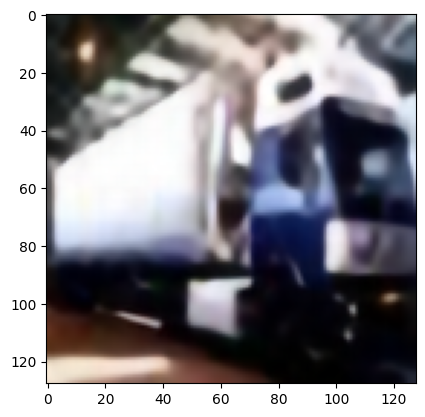

In [25]:
for b, l in sr_dataloader:
    print(b.shape, l.shape)
    plt.imshow(b[10].permute(1, 2, 0))
    plt.show()
    break